### Time Series Analysis

#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import plotly.express as px

#### Panda Datetime Index

In [2]:
pd.date_range('2022-10-01', periods = 15, freq = "D")
pd.to_datetime(['10/01/2021', '10/02/2021'], format ="%d/%m/%Y")
              
arr_1 = np.random.randint(10, 50, size = (3,3))
date_arr = pd.date_range('2021-01-01', periods = 3, freq = 'D')
df_1 = pd.DataFrame(arr_1, columns = ['A', 'B', 'C'], index=date_arr)
df_1
df_1.index.min()

Timestamp('2021-01-01 00:00:00', freq='D')

#### Time Resampling

<AxesSubplot:xlabel='AAPL_x'>

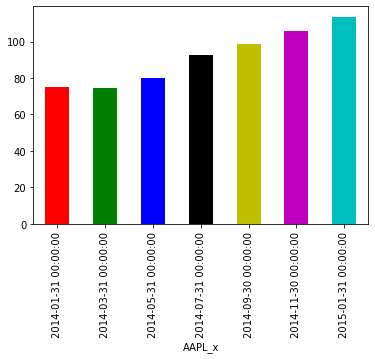

In [3]:
df_appl = pd.read_csv('appl.csv')
px.line(df_appl, x="AAPL_x", y = "AAPL_y",
        labels = {'x': "Date", 'y': "Price"})
df_appl.head()
df_appl = pd.read_csv('appl.csv', index_col="AAPL_x",
                        parse_dates=True)
df_appl


arr_2 = np.random.randint(86000000, 256000000, size = 240)
df_appl['Volume'] = arr_2
df_appl.rename(columns={'AAPL_y': "Price"}, inplace=True)
df_appl

df_appl.resample(rule="A").std()
df_appl["Price"].resample(rule="2M").mean().plot.bar(color=list('rgbkymc'))

#### Moving Average

<AxesSubplot:xlabel='AAPL_x'>

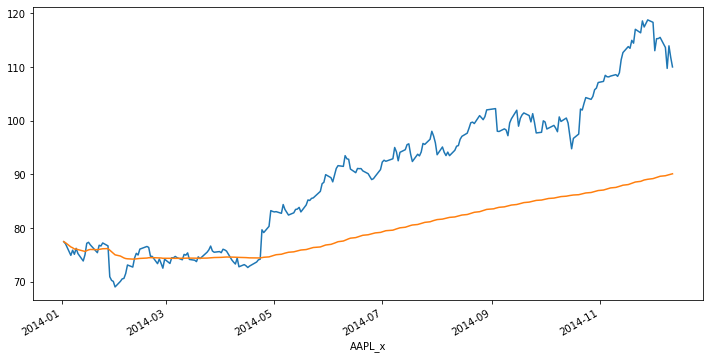

In [8]:
df_appl['Price'].plot(figsize = (12, 6))
# df_appl.rolling(window = 30).mean()['Price'].plot()
df_appl['Price'].expanding().mean().plot(figsize= (12, 6))

#### Shifting Time Data

In [10]:
df_appl = df_appl.shift(1)
df_appl

,Price,Volume
AAPL_x,,
2014-01-02,NaN,NaN
2014-01-03,77.445395,199928839.0
2014-01-06,77.045575,158211597.0
2014-01-07,74.896972,243933367.0
2014-01-08,75.856461,103678723.0
...,...,...
2014-12-08,115.536126,121333474.0
2014-12-09,113.653345,106419512.0
2014-12-10,109.755497,146346487.0
